<a href="https://colab.research.google.com/github/Riyan081/Python-CDAC/blob/main/Copy_of_ML_ISA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features.copy()
y = bank_marketing.data.targets.copy()

In [ ]:
import pandas as pd

y = y.squeeze()
y = y.map({'no':0, 'yes':1})

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
X.shape

(45211, 16)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
cat_cols = [
    "job", "education", "default", "housing", "loan",
    "poutcome", "month", "contact"
]

num_cols = [
    "age", "balance",
    "campaign", "pdays", "previous",
    "duration"
]

In [ ]:
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

for col in cat_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

/tmp/ipython-input-2989194197.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), cat_cols),

        ("num", "passthrough", num_cols)
    ]
)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression())
])

lr_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job', 'education',
                                                   'default', 'housing', 'loan',
                                                   'poutcome', 'month',
                                                   'contact']),
                                                 ('num', 'passthrough',
                                                  ['age', 'balance', 'campaign',
                                                   'pdays', 'previous',
                                                   'duration'])])),
                ('clf', LogisticRegression())])

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.8863209112020347
Precision: 0.5462962962962963
Recall   : 0.16729678638941398
F1 Score : 0.25615050651230103


In [ ]:
y_prob = lr_model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC Score:", auc_score)

AUC Score: 0.7968785991692837


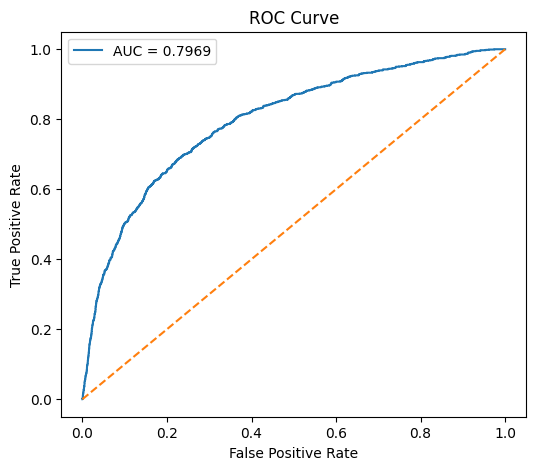

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_threshold(threshold):
    y_pred = (y_prob >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)

    return acc, pre, rec, f1

In [ ]:
acc1, pre1, rec1, f11 = evaluate_threshold(0.5)


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.01)

best_thr = 0
best_f1 = 0

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    score = f1_score(y_test, y_pred)

    if score > best_f1:
        best_f1 = score
        best_thr = t

print("Best Threshold:", best_thr)


Best Threshold: 0.22999999999999995


In [ ]:
acc2, pre2, rec2, f12 = evaluate_threshold(best_thr)

In [ ]:
print("\nThreshold = 0.5")
print("Accuracy :", acc1)
print("Precision:", pre1)
print("Recall   :", rec1)
print("F1 Score :", f11)

print("\nOptimized Threshold =", best_thr)
print("Accuracy :", acc2)
print("Precision:", pre2)
print("Recall   :", rec2)
print("F1 Score :", f12)



Threshold = 0.5
Accuracy : 0.8863209112020347
Precision: 0.5462962962962963
Recall   : 0.16729678638941398
F1 Score : 0.25615050651230103

Optimized Threshold = 0.22999999999999995
Accuracy : 0.8524825832135353
Precision: 0.39732142857142855
Recall   : 0.504725897920605
F1 Score : 0.4446294754371357


Q1. Why is the ROC curve useful?

ans. ROC shows how well the model separates classes across all thresholds by plotting TPR vs FPR, and AUC summarizes overall performance independent of any single threshold.

Q2. What changes when the threshold changes (precision–recall trade-off)?

ans. Lowering threshold increases recall but reduces precision (more positives detected but more false alarms), while increasing threshold increases precision but reduces recall (fewer false alarms but more missed positives).
